# Лабараторная работа №1


## Описание датасета
Этот набор данных состоит из оценок, полученных учащимися по различным предметам. Оценки, полученные учащимися в старшей школе.
Учащиеся из Соединенных Штатов. Датасет: https://www.kaggle.com/datasets/spscientist/students-performance-in-exams

## Атрибуты 
- gender: string(male, female)
- race/ethnicity: string(group A-E)
- parental level of education: string(some college, associate's degree, high school, some high school, bachelor's degree)
- lunch: string(standard, free/reduced)
- test preparation course: string(none, completed)
- math score: integer(0-100)
- reading score: integer(0-100)
- writing score: integer(0-100)

## Анализ данных
Откроем файл и убедимся, что все атрибуты присутствуют

In [ ]:
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np


file = pd.read_csv("data/StudentsPerformance.csv")
file.head()

## Найдем пустые значения

In [ ]:
file.info()
file.isnull().sum()

Пустых значений нет

## Найдем СКО и средние значения 

In [ ]:
attrs = [file['math score'], file['reading score'], file['writing score']]
for attr in attrs:
    print(f"{attr.name} среднее = {np.mean(attr)}")
    print(f"{attr.name} СКО = {np.std(attr)}")
    print("\n")

## Построим гистограммы 

In [ ]:
for x in attrs:
    fig = plt.figure()
    fig.suptitle(x.name)
    fig.supxlabel("Значение")
    fig.supylabel("Кол-во")
    x.hist()

## Найдем выбросы

In [ ]:
fig = file.boxplot()

Выбросы есть.

## Найдем корреляцию
Для начала построим матрицы рассеивания

In [ ]:
frame = pd.DataFrame(file.select_dtypes(include=['number']))
scatter_matrix = pd.plotting.scatter_matrix(frame)

Проверим какие параметры коррелируют с помощью матрицы корреляций

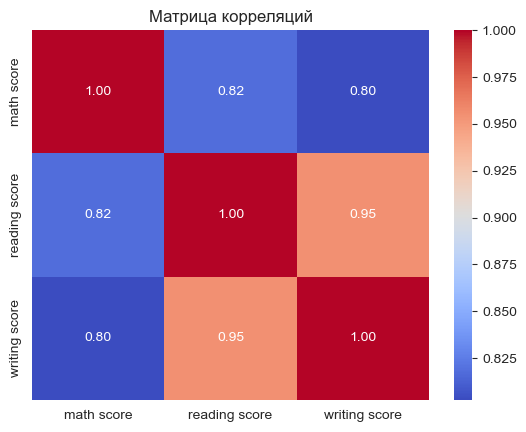

In [32]:
import seaborn as sns

correlation_matrix = frame.corr()
plt.figure()
sns.heatmap(correlation_matrix, annot=True, fmt=".2f", cmap='coolwarm', cbar=True,
            xticklabels=correlation_matrix.columns, yticklabels=correlation_matrix.columns)
plt.title('Матрица корреляций')
plt.show()

## Анализ корреляции
Можно заметить, что результаты по математике не сильно влияют на оценки по двум другим гуманитарным дисциплинам. А вот чтение и писание между собой очень сильно коррелируют, что логично.